In [ ]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()
#0 T-shirt
#1 Trousers
#2 Pullover
#3 Dress
#4 Coat
#5 Sandala
#6 Shirt
#7 Sneakera
#8 Bag
#9 Ankle boot

4431872/4422102 [==============================] - 0s 0us/step


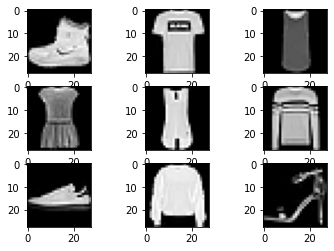

In [ ]:
from numpy.ma.core import correlate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

for i in range (9): #run from 0 to 8
  plt.subplot(330+i+1)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
x_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
Y_train=to_categorical(Y_train,10)
Y_test=to_categorical(Y_test,10)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1)) #loại bỏ bớt các trọng số không quan trọng, không ảnh hưởng
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
history=model.fit(X_train,Y_train,batch_size=250,epochs=500,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/500
240/240 [==============================] - 41s 161ms/step - loss: 0.6738 - accuracy: 0.7599 - val_loss: 0.4815 - val_accuracy: 0.8197
Epoch 2/500
240/240 [==============================] - 30s 126ms/step - loss: 0.4272 - accuracy: 0.8439 - val_loss: 0.4540 - val_accuracy: 0.8173
Epoch 3/500
240/240 [==============================] - 32s 133ms/step - loss: 0.3768 - accuracy: 0.8623 - val_loss: 0.4256 - val_accuracy: 0.8479
Epoch 4/500
240/240 [==============================] - 31s 127ms/step - loss: 0.3448 - accuracy: 0.8735 - val_loss: 0.4055 - val_accuracy: 0.8583
Epoch 5/500
240/240 [==============================] - 30s 125ms/step - loss: 0.3302 - accuracy: 0.8799 - val_loss: 0.4752 - val_accuracy: 0.8490
Epoch 6/500
240/240 [==============================] - 30s 125ms/step - loss: 0.3147 - accuracy: 0.8842 - val_loss: 0.3768 - val_accuracy: 0.8694
Epoch 7/500
240/240 [==============================] - 30s 125ms/step - loss: 0.3018 - accuracy: 0.8891 - val_loss: 0.3603 -

In [ ]:
model.save('fashion.h5')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

313/313 [==============================] - 3s 8ms/step - loss: 9.9596 - accuracy: 0.8960
Test loss= 9.959585189819336
Test accuracy= 0.8960000276565552


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

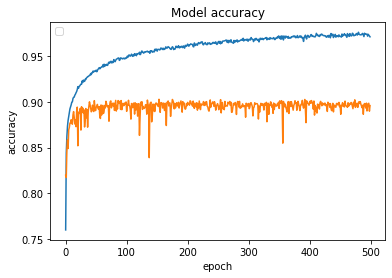

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2656373e-02
  0.0000000e+00 3.3149397e-10]]
